In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
#import all other modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input,Dense,SimpleRNN,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

(1000,)


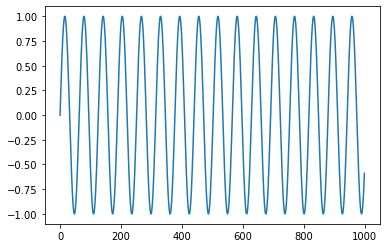

In [30]:
#Create the synthetic data
series = np.sin(0.1*np.arange(1000)) #+np.random.randn(200)*0.1

#plot the data
plt.plot(series)
plt.show()

In [36]:
#Build the dataset for T
T=10
D=1
X=[]
Y=[]

for t in range(len(series)- T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T,1)
Y = np.array(Y)
N = len(X)
print(X.shape, Y.shape)

(990, 10, 1) (990,)


In [39]:
#Build RNN model
i = Input(shape=(T,1))
x = SimpleRNN(15,activation='relu')(i)
x = Dense(1)(x)
model = Model(i,x)

model.compile(optimizer = Adam(0.001),loss = 'mse')

r = model.fit(X[:-N//2],Y[:-N//2], validation_data = (X[-N//2:],Y[-N//2:]),epochs=80)


Epoch 1/80
16/16 [==============================] - 0s 26ms/step - loss: 0.3474 - val_loss: 0.2004
Epoch 2/80
16/16 [==============================] - 0s 15ms/step - loss: 0.1419 - val_loss: 0.0887
Epoch 3/80
16/16 [==============================] - 0s 15ms/step - loss: 0.0586 - val_loss: 0.0315
Epoch 4/80
16/16 [==============================] - 0s 14ms/step - loss: 0.0198 - val_loss: 0.0128
Epoch 5/80
16/16 [==============================] - 0s 15ms/step - loss: 0.0087 - val_loss: 0.0063
Epoch 6/80
16/16 [==============================] - 0s 14ms/step - loss: 0.0044 - val_loss: 0.0030
Epoch 7/80
16/16 [==============================] - 0s 15ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 8/80
16/16 [==============================] - 0s 14ms/step - loss: 0.0012 - val_loss: 9.4293e-04
Epoch 9/80
16/16 [==============================] - 0s 15ms/step - loss: 7.1641e-04 - val_loss: 6.0391e-04
Epoch 10/80
16/16 [==============================] - 0s 14ms/step - loss: 5.1010e-04 - val_loss: 

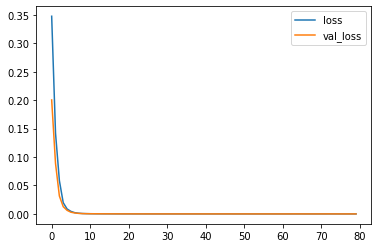

In [40]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [42]:
#validation data

validation_target = Y[-N//2:]
validation_predictions = []

#first validation data
last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1, 1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

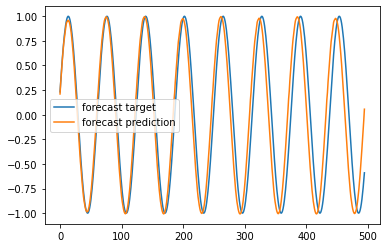

In [43]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()